## Task no1. 
Calculate and compare the accuracy, precision, recall and F1-score for each model and 
mention the strengths and weakness of each classification algorithm.

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = sns.load_dataset('titanic')

# Inspect the dataset
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
data.drop(columns=['class', "who", "adult_male", "deck", "embark_town", "alive"], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
data['age'] = imputer.fit_transform(data[['age']]).ravel()
data['embarked'] = imputer.fit_transform(data[['embarked']]).ravel()

# Encode categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])  # 'male' -> 1, 'female' -> 0
data['embarked'] = encoder.fit_transform(data['embarked'])  # 'S', 'C', 'Q' -> 0, 1, 2

# Define features (X) and target (y)
X = data.drop(columns=['survived'])
y = data['survived']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg_model = LogisticRegression(max_iter=500, solver='lbfgs')  # Increased max_iter
dt_model = DecisionTreeClassifier()
svm_model = SVC(probability=True)

# Train models
logreg_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train, y_train)  # Decision tree does not require scaling
svm_model.fit(X_train_scaled, y_train)

# Evaluate metrics
models = {"Logistic Regression": logreg_model, "Decision Tree": dt_model, "SVM": svm_model}

for model_name, model in models.items():
    if model_name in ["Logistic Regression", "SVM"]:  # Use scaled data for these models
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Metrics for Logistic Regression:
Accuracy: 0.7933
Precision: 0.7681
Recall: 0.7162
F1-Score: 0.7413

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Metrics for Decision Tree:
Accuracy: 0.7654
Precision: 0.7105
Recall: 0.7297
F1-Score: 0.7200

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


Metrics for SVM:
Accuracy: 0.8156
Precision: 0.8060
Recall: 0.7297
F1-Score: 0.7660

Classification R

## Task no2. 
Perform hyperparameter tuning for the Decision Tree classifier to optimize its 
performance. 

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_dt_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Task no3. 
Perform k-fold cross-validation for each classification model (Logistic Regression, Decision 
Trees, and SVM). Calculate and compare the cross-validation accuracy scores for each 
model.

In [26]:
from sklearn.model_selection import cross_val_score

models = {"Logistic Regression": logreg_model, "Decision Tree": best_dt_model, "SVM": svm_model}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.7969 ± 0.0201
Decision Tree Cross-Validation Accuracy: 0.8148 ± 0.0298
SVM Cross-Validation Accuracy: 0.6746 ± 0.0460


## Task no4.
Plot and analyze Receiver Operating Characteristic (ROC) curves and calculate the Area 
Under the Curve (AUC) for each model. 

c:\Users\Sikandar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Sikandar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


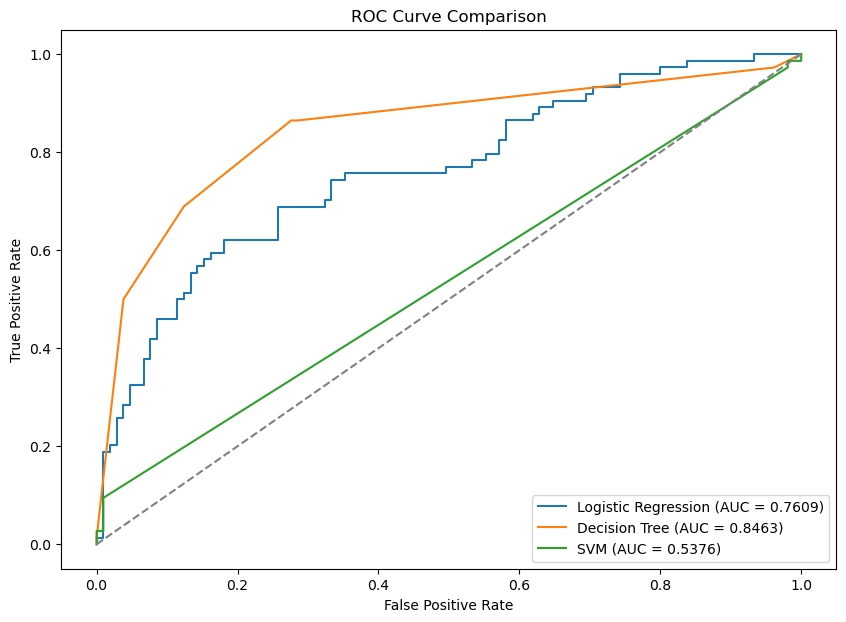

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Ensure model supports predict_proba
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
